<a href="https://colab.research.google.com/github/isaac-ron/ai-dlpractical1/blob/main/practical1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST DIGIT CLASSIFIER - BUILD, TRAIN AND EVALUATE**
# RON ISAAC
# CS/MG/1885/09/22

Importing relevant Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Set random seed for reproducibility

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

Load and Prepare MNIST dataset

In [ ]:
print("Loading MNIST dataset...")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print("MNIST dataset loaded.")

Loading MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
MNIST dataset loaded.


Normalize pixel values to [0, 1]

In [ ]:
X_train = x_train.astype("float32") / 255.0
X_test = x_test.astype("float32") / 255.0

Visualize sample images

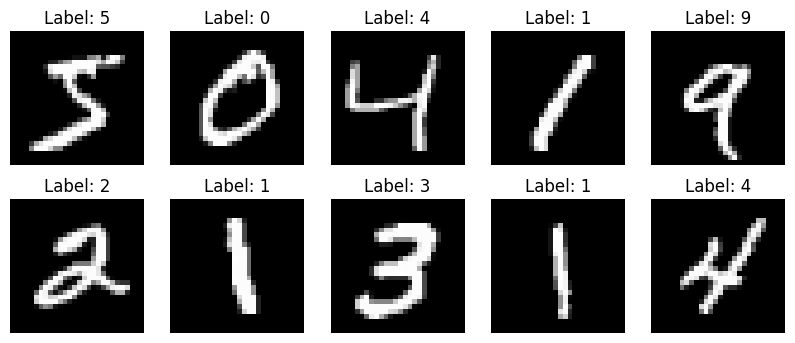

In [ ]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

Building the neural network

In [ ]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Training the model

In [ ]:
print("Training the model")
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)
print("Model training completed.")

Training the model
Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8705 - loss: 0.4365 - val_accuracy: 0.9677 - val_loss: 0.1107
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9660 - loss: 0.1135 - val_accuracy: 0.9712 - val_loss: 0.0915
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9763 - loss: 0.0752 - val_accuracy: 0.9760 - val_loss: 0.0842
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9838 - loss: 0.0533 - val_accuracy: 0.9747 - val_loss: 0.0953
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9873 - loss: 0.0404 - val_accuracy: 0.9738 - val_loss: 0.0987
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9902 - loss: 0.0313 - val_accuracy: 0.9753 - val_loss: 0.0981
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9907 - loss: 0.0278 - val_accuracy: 0.9745 - val_loss: 0.1073
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0

Evaluating the model

In [ ]:
print("Evaluating the model on test data...")
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

Evaluating the model on test data...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9710 - loss: 0.1286
Test Accuracy: 0.9729999899864197


Plot training history

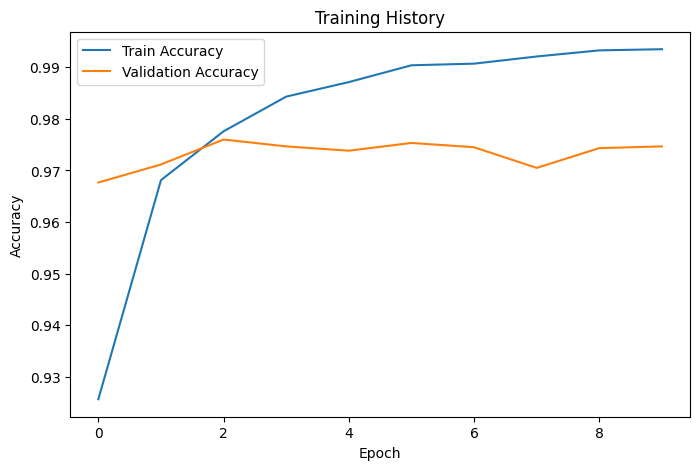

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training History')
plt.legend()
plt.show()

Prediction testing on new samples

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


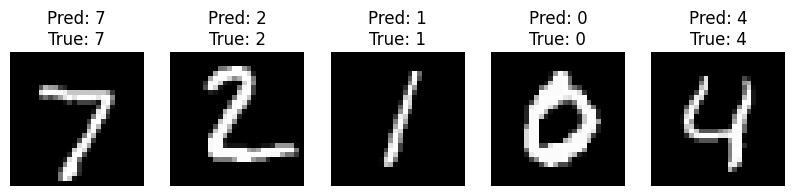

In [ ]:
predictions = model.predict(X_test)

plt.figure(figsize=(10,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test[i], cmap='gray')
    predicted_label = np.argmax(predictions[i])
    plt.title(f"Pred: {predicted_label}\nTrue: {y_test[i]}")
    plt.axis('off')
plt.show()